# MMDetection (inference)

In [1]:
!nvcc --version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies:
# Using older versions of torch and torchvision, as well as cuda 12.1 because of the compatibility
!pip install -U torch==2.1.0+cu121 torchvision==0.16.0+cu121 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv thus we could use CUDA operators
!pip install mmcv==2.1.0 -f https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
# !git clone https://github.com/open-mmlab/mmdetection.git -b v2.25.0
%cd mmdetection

!pip install -e .

!pip install -U openmim

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 38019, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 38019 (delta 39), reused 61 (delta 25), pack-reused 37917
Receiving objects: 100% (38019/38019), 63.24 MiB | 22.52 MiB/s, done.
Resolving deltas: 100% (26205/26205), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [3]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.1.0+cu121 cuda: False
mmdetection: 3.3.0
mmcv: 2.1.0
mmengine: 0.10.4


In [4]:
%%bash
# Check nvcc version
nvcc -V
echo
# Check GCC version
gcc --version
echo
# Check the version of torch and cuda packages
pip list | grep "torch\|cuda"

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0

gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.


cupy-cuda12x                     12.2.0
jaxlib                           0.4.26+cuda12.cudnn89
torch                            2.1.0+cu121
torchaudio                       2.2.1+cu121
torchdata                        0.7.1
torchsummary                     1.5.1
torchtext                        0.17.1
torchvision                      0.16.0+cu121


In [5]:
# Google Drive setup
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Inference

In [ ]:
mask_rcnn_model_name = 'mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco'
!mim download mmdet --config {mask_rcnn_model_name} --dest ./checkpoints

processing mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 5.8 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth to /content/mmdetection/checkpoints
Successfully dumped mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py to /content/mmdetection/checkpoints


In [6]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules


# Choose to use a config and initialize the detector
# config_file = './configs/mask_rcnn/' + mask_rcnn_model_name + '.py'
config_file = "/content/gdrive/MyDrive/cell_nuclei_data/COCO_cell_nuclei/tutorial_exps/mask-rcnn_r101-caffe_fpn_1x_coco/mask-rcnn_r101-caffe_fpn_1x_coco_cell_nuclei.py"

# Setup a checkpoint file to load
# checkpoint_file = './checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
checkpoint_file = "/content/gdrive/MyDrive/cell_nuclei_data/COCO_cell_nuclei/tutorial_exps/mask-rcnn_r101-caffe_fpn_1x_coco/epoch_100.pth"

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'

Loads checkpoint by local backend from path: /content/gdrive/MyDrive/cell_nuclei_data/COCO_cell_nuclei/tutorial_exps/mask-rcnn_r101-caffe_fpn_1x_coco/epoch_100.pth


In [7]:
# Use the detector to do inference
# image = mmcv.imread('demo/demo.jpg',channel_order='rgb')
image = mmcv.imread('/content/cell_nuclei_unet_input.png',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_id: 0
    batch_input_shape: (800, 800)
    pad_shape: (800, 800)
    ori_shape: (389, 389)
    scale_factor: (2.056555269922879, 2.056555269922879)
    img_path: None
    img_shape: (800, 800)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            masks: BitmapMasks(num_masks=0, height=389, width=389)
            labels: tensor([], dtype=torch.int64)
        ) at 0x7a145ab1d1b0>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            masks: BitmapMasks(num_masks=0, height=389, width=389)
            labels: tensor([], dtype=torch.int64)
        ) at 0x7a145ab1c8b0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[320.8585, 171.1

## Plotting result

In [8]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.TensorboardVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


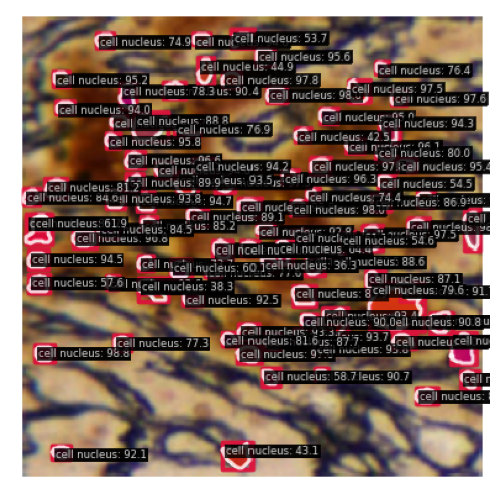

In [9]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

In [10]:
image.shape

(389, 389, 3)